In [18]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import keras


In [19]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [20]:
features, labels = load_cfar10_batch('cifar-10-batches-py', 1)

In [21]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
labels[:5]

[6, 9, 9, 4, 1]

In [23]:
features[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [24]:
features.shape

(10000, 32, 32, 3)

In [25]:
np.asarray(labels).shape

(10000,)

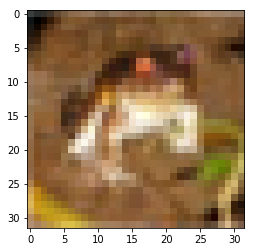

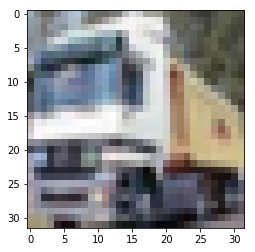

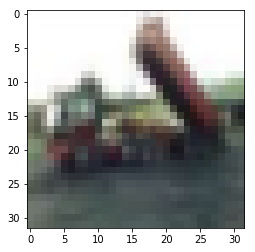

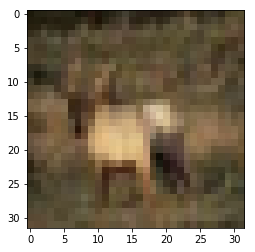

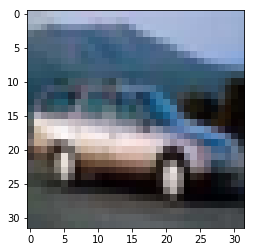

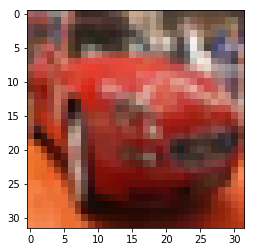

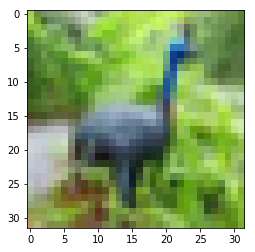

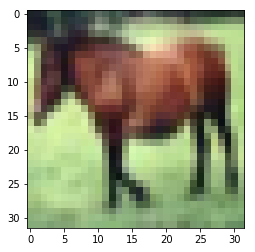

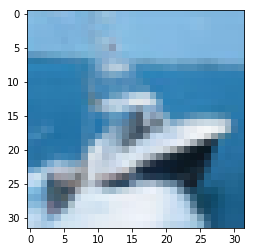

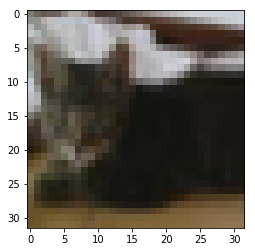

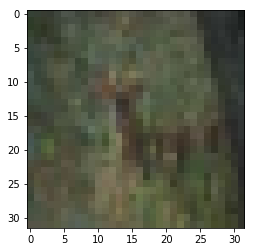

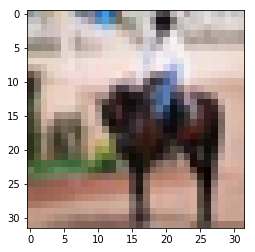

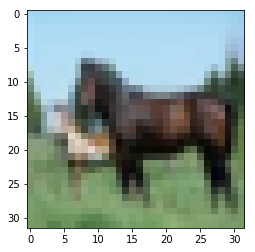

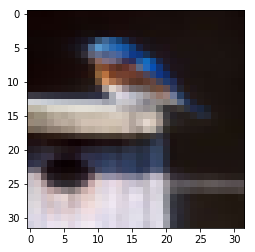

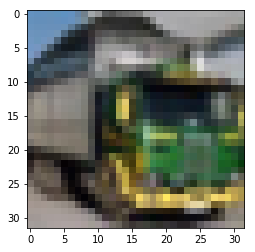

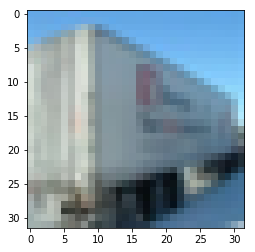

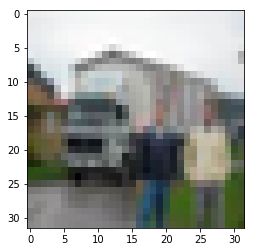

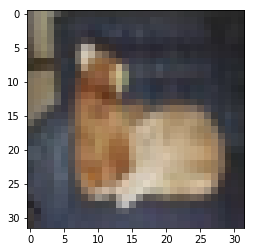

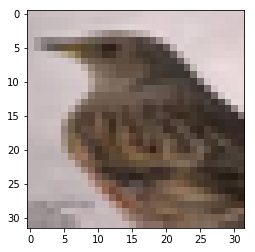

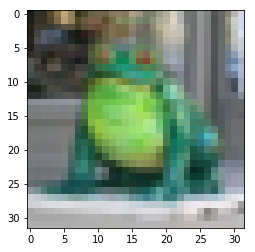

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in range(20):
    image = features[i]
    plt.imshow(image)
    plt.show()

In [27]:
data_scaled = features/255
X_train, X_test, y_train, y_test = train_test_split(
                        data_scaled, labels, test_size=0.2, random_state=42)

In [28]:
data_scaled[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [40]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), input_shape = (32, 32, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [44]:
model.compile(loss = "sparse_categorical_crossentropy",
            optimizer = keras.optimizers.Adamax(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
              
              metrics = ['accuracy'])
tensorboard = keras.callbacks.TensorBoard(log_dir = "./Graph",
                                          histogram_freq = 0, write_graph = True, write_images = True)
model.fit(X_train, y_train, batch_size = 128,
                                  epochs = 20,
          validation_data=(X_test, y_test),
              callbacks = [tensorboard])

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 32s 4ms/step - loss: 0.6501 - acc: 0.8804 - val_loss: 2.9111 - val_acc: 0.5805
Epoch 2/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.0217 - acc: 0.9966 - val_loss: 2.8969 - val_acc: 0.5910
Epoch 3/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.0092 - acc: 0.9999 - val_loss: 2.9625 - val_acc: 0.5960
Epoch 4/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 2.9873 - val_acc: 0.5920
Epoch 5/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 3.0219 - val_acc: 0.5930
Epoch 6/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 3.0380 - val_acc: 0.5945
Epoch 7/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.0633 - val_acc: 0.5980
Epoch 8

In [ ]:
model.save_weights("model.h5")

In [ ]:
from keras.models import load_model
model.load_weights('model.h5', by_name=True)

In [45]:
lbl_pre = model.predict_classes(X_test)

In [48]:
print(classification_report(y_test, lbl_pre))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62       207
           1       0.67      0.72      0.70       213
           2       0.50      0.49      0.50       197
           3       0.41      0.41      0.41       199
           4       0.58      0.49      0.53       205
           5       0.46      0.50      0.48       177
           6       0.58      0.63      0.60       187
           7       0.67      0.66      0.66       200
           8       0.73      0.76      0.74       224
           9       0.64      0.63      0.64       191

   micro avg       0.59      0.59      0.59      2000
   macro avg       0.59      0.59      0.59      2000
weighted avg       0.59      0.59      0.59      2000

